<div dir=ltr align=center>
<font color=05fffb size=7>
    Introduction to Machine Learning <br>
<font color=05ff3b size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=fffb03 size=6>
    Project <br>
<font color=f703ff size=5>
    AmirHossein Zahedi 99101705

<div dir=ltr align=left>
<font color=05fffb size=6>
    Libraries <br>

In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import joblib

<div dir=ltr align=left>
<font color=05fffb size=6>
    Part 2 -> Data Review <br>

<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 2.1 -> Reading <br>

<div dir="rtl">
در این بخش داده را می خوانیم و مشاهده می کنیم که 2000 سطر و 10 ستون ویژگی دارد. عددی یا کیفی بودن هر ویژگی نیز مشخص شده است.
</div>

In [388]:
## Reading data
data_raw = pd.read_csv('train_data.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       2000 non-null   int64 
 1   Age      2000 non-null   int64 
 2   MF       2000 non-null   object
 3   LoE      1990 non-null   object
 4   YoW      2000 non-null   int64 
 5   YoCW     2000 non-null   int64 
 6   Income   2000 non-null   int64 
 7   Housing  1990 non-null   object
 8   Car      1990 non-null   object
 9   Res      2000 non-null   object
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 2.2 -> Preprocessing <br>

<div dir="rtl">
در این بخش داده های پرت را با استفاده از فرض توزیع گوسی برای آن ها حذف می کنیم به این صورت که داده هایی که بیش از دو برابر انحراف معیار از میانگین فاصله داشته باشند، که 5 درصد از توزیع را شامل می شوند، به عنوان داده های پرت در نظر گرفته شده و حذف می شوند.
</div>

<div dir="rtl">
مشاهده می کنیم که 5 داده از 2000 داده حذف می شوند.
</div>

In [389]:
## Removing outliers
number_cols = data_raw.select_dtypes(include=['int64']).columns
data_prep = data_raw
for i in number_cols:
    mean_col = np.mean(data_raw[i])
    std_col = np.std(data_raw[i])
    l_bound = mean_col - 2*std_col
    h_bound = mean_col + 2*std_col
    data_prep = data_raw[(data_raw[i] >= l_bound) & (data_raw[i] <= h_bound)]
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1995 non-null   int64 
 1   Age      1995 non-null   int64 
 2   MF       1995 non-null   object
 3   LoE      1985 non-null   object
 4   YoW      1995 non-null   int64 
 5   YoCW     1995 non-null   int64 
 6   Income   1995 non-null   int64 
 7   Housing  1985 non-null   object
 8   Car      1985 non-null   object
 9   Res      1995 non-null   object
dtypes: int64(5), object(5)
memory usage: 171.4+ KB


<div dir="rtl">
در این بخش داده ها (سطر ها) را که مقادیر نا مشخص را در ویژگی های خود دارند حذف می کنیم. 30 سطر حذف می شوند. اگر دیتای اولیه را ببینیم متوجه می شویم که سه ویژگی در 10 سطر مقادیر nan داشتند که در این بخش آن 30 سطر در کل حذف شدند. در نهایت 1965 سطر پس از مراحل پیش پردازش باقی می ماند.
</div>

In [390]:
## Removing NANs
data_prep = data_prep.dropna()
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1965 non-null   int64 
 1   Age      1965 non-null   int64 
 2   MF       1965 non-null   object
 3   LoE      1965 non-null   object
 4   YoW      1965 non-null   int64 
 5   YoCW     1965 non-null   int64 
 6   Income   1965 non-null   int64 
 7   Housing  1965 non-null   object
 8   Car      1965 non-null   object
 9   Res      1965 non-null   object
dtypes: int64(5), object(5)
memory usage: 168.9+ KB


<div dir="rtl">
در این قسمت ویژگی های کیفی را به عددی تغییر می دهیم. برای مثال اگر ویژگی حاوی سه حالت کیفی باشد، به آن مقادیر، 0، 1 و 2 تعلق می گیرند تا ویژگی کمی شود. داده های تغییر یافته را نیز می توانیم مشاهده کنیم. برای آنکه ترتیب را بدانیم تا در قسمت t-test استفاده کنیم، روش اول را کنار گذاشته و مقادیر کیفی را دستی عددی می کنیم.
</div>

In [391]:
## Changing object columns to numerical
# object_cols = data_prep.select_dtypes(include=['object']).columns
# for i in object_cols:
#     encoder = LabelEncoder()
#     data_prep[i] = encoder.fit_transform(data_prep[i])
# data_prep.info

print(data_prep['MF'].unique())
print(data_prep['LoE'].unique())
print(data_prep['Housing'].unique())
print(data_prep['Car'].unique())
print(data_prep['Res'].unique())

data_prep['MF'] = data_prep['MF'].map({'M':1 ,'F':0})
data_prep['LoE'] = data_prep['LoE'].map({'Dip':0 ,'Ad. Dip':1 ,'Bach':2 ,'Mst':3 ,'Doct':4 ,'P. Doct':5})
data_prep['Housing'] = data_prep['Housing'].map({'O':2 ,'R':1 ,'N':0})
data_prep['Car'] = data_prep['Car'].map({True:1 ,False:0})
data_prep['Res'] = data_prep['Res'].map({'Accept':1 ,'Reject':0})
data_prep.info

['F' 'M']
['Bach' 'Ad. Dip' 'Dip' 'Mst' 'P. Doct' 'Doct']
['R' 'O' 'N']
[False True]
['Accept' 'Reject']


<bound method DataFrame.info of         Id  Age  MF  LoE  YoW  YoCW   Income  Housing  Car  Res
0        0   60   0    2    4     4  4759451        1    0    1
1        1   60   0    2    4     4  4759451        1    0    1
2        2   76   1    2    8     8  8237019        1    1    1
3        3   28   1    1    4     4  9114804        1    0    1
4        4   44   1    1   16     5   998868        1    0    0
...    ...  ...  ..  ...  ...   ...      ...      ...  ...  ...
1995  1995   61   1    0    9     4  5316246        1    1    1
1996  1996   50   1    1    3     3  2062048        1    1    0
1997  1997   52   1    3    8     6  5811902        1    0    1
1998  1998   41   1    4   15    14  5866909        1    0    1
1999  1999   66   0    2    3     3  8199311        1    1    1

[1965 rows x 10 columns]>

<div dir="rtl">
در اینجا ویژگی آخر را که پذیرفته شدن یا نشدن بود را به عنوان برچسب برای هر سطر انتخاب می کنیم. 0 به معنای پذیرفته نشدن و 1 به معنای پذیرش است. همچنین پس از جدا سازی داده از لیبل ها، آن ها را نرمالیزه می کنیم با نرمالیزیشن MinMax، که اینگونه همه ویژگی ها مقادیر بین 0 و 1 به خود می گیرند.
</div>

In [392]:
## Seperating data from label
data = data_prep.drop(columns='Res')
labels = data_prep['Res']

## Normalization (z-score)
#scaler = StandardScaler()
#data = scaler.fit_transform(data)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

print(data.shape)
print(labels.shape)

(1965, 9)
(1965,)


<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 2.3 -> Plotting <br>

<div dir="rtl">
در این بخش هر ویژگی را در نظر گرفته و برای دو کلاس پذیرش و عدم پذیرش، هیستوگرام هر کدام را می کشیم. <br>
در این بخش به دنبال ویژگی یا ویژگی هایی هستیم که با استفاده از هیستوگرام آن ها جدایی پذیری خوبی برای دو کلاس داشته باشند. <br>
هیچ کدام از ویژگی ها به اندازه کافی نمی توانند تفکیک پذیری دو کلاس را تامین کنند و نیازمند ترکیب خطی یا غیر خطی ویژگی ها هستیم تا تفکیک پذیری حاصل شود اما با این حال، به نظر ویژگی درامد به دلیل توزیع مکمل، و به خصوص ویژگی سطح آموزش (LoE) ویژگی های بهتری باشند.
</div>

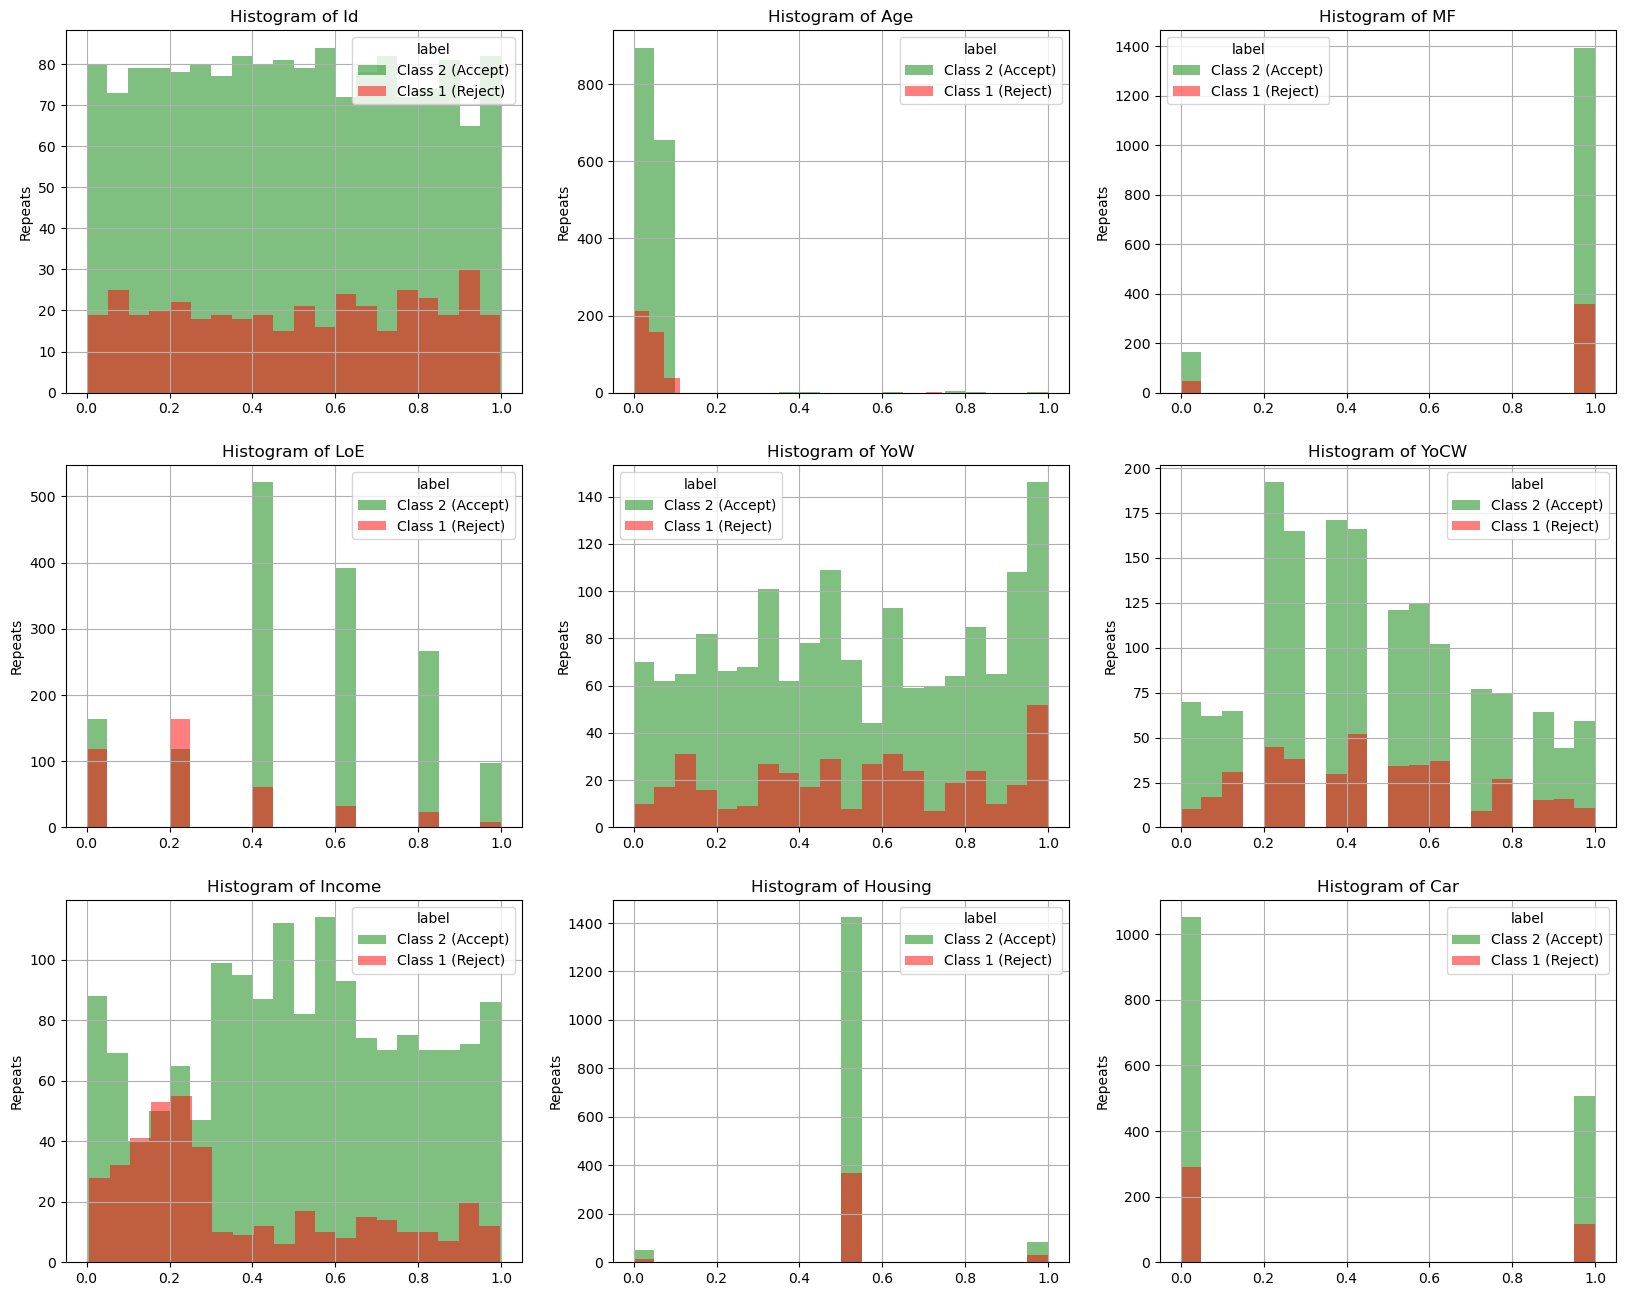

In [88]:
## Plotting histograms of features
number_features = np.size(data,1)
feature_names = data_raw.columns
class1_indexes = np.where(labels == 0)
class2_indexes = np.where(labels == 1)

plt.figure(figsize=(20, 16))
for i in range(number_features):
    plt.subplot(3,3,i+1)
    plt.hist(data[class2_indexes][:,i], bins=20, align='mid', alpha=0.5, color='green', label='Class 2 (Accept)')
    plt.hist(data[class1_indexes][:,i], bins=20, align='mid', alpha=0.5, color='red', label='Class 1 (Reject)')
    plt.title('Histogram of ' + feature_names[i])
    plt.ylabel('Repeats')
    plt.legend(title='label')
    plt.grid()
plt.show()

<div dir="rtl">
در این قسمت هیستوگام لیبل ها را رسم می کنیم، همانطور که مشاهده می شود، داده ها نامتعادل هستند و تعداد پذیرش ها در حدود 4 برابر تعداد داده های عدم پذیرش هستند. <br>
از آنجا که در داده های نامتعادل، هدف بیشتر طبقه بندی کلاس نادر تر است، معیار هایی که کلاس بزرگتر را دخیل می کنند چندان برای معیار ارزیابی مناسب نیستند. برای مثال معیار صحت (Accuracy)  چندان مناسب نیست زیرا که Accuracy به دلیل بسیار بیشتر بودن یکی از کلاس ها صحت خیلی خوبی نشان می دهد که درست نیست. <br>
معیار هایی مانند Precision و Recall عملکرد مناسب تری دارند زیرا که داده های درست طبقه بندی شده کلاس بزرگتر را دخیل نمیکنند. به نظر من معیار F1-Score بهترین نتیجه را می دهد زیرا که داده های غلط طبقه بندی شده و درست طبقه بندی شده برای کلاس نادر تر را در نظر میگیرد اما داده های درست طبقه بندی شده کلاس بزرگ که عمده داده ها هستند را در نظر نمی گیرد. به همین دلیل معیار F1-Score معیار مناسب تر و نزدیک به واقعیت تری است. <br>
با استفاده از Precision و Recall می توان نمودار PRC را کشید و مساحت زیر آن را بدست آورد که با نام AUPRC شناخته می شود و معیار مناسبی است.
</div>

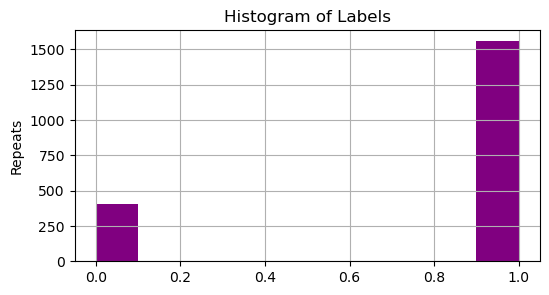

In [90]:
## Plotting histograms of labels
plt.figure(figsize=(6, 3))
plt.hist(labels, bins=10,color='Purple',align='mid')
plt.title('Histogram of Labels')
plt.ylabel('Repeats')
plt.grid()
plt.show()

<div dir="rtl">
همانند بخش قبلی در این بخش نیز با 5 جفت یافت شده نمی توان حرف دقیقی درباره تفکیک زد و صرفا م یتوان پراکندگی آن ها را مشاهده کرد. <br>
به دلیل آنکه بعضی از ویژگی ها باینری هستند یا به طور کل گسسته هستند ممکن است پراکندگی خوبی در آن ویژگی ها به نمایش در نیاید. <br>
نمودار های رسم شده به صورت رندوم بین درآمد و جنسیت، سطح آموزش و سن، خودرو و درآمد، درآمد و سابقه کار شغل فعلی، خانه داشتن و سابقه کار کلی است. البته اگر ران مجدد بگیرید تغییر خواهد کرد. <br>
با توجه به مقادیر همبستگی، کلا ویژگی ها همبستگی کمی دارند و در بین جفت ویژگی های گفته شده، خودرو و درامد کمترین ضریب همبستگی را دارند که اصلا منطقی نیست و توقع برعکس می رفت. بقیه جفت ها نیز ضریب همبستگی در حدود 0.02 دارند که کم است. 
</div>

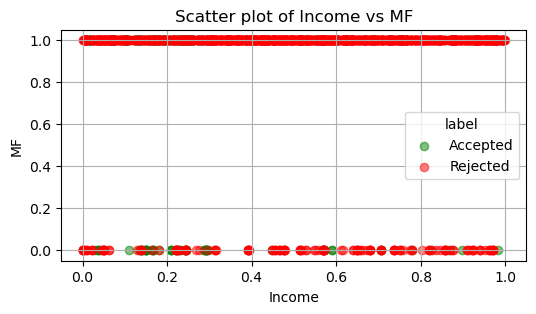

Correlation between Income and MF = 0.023926623482023637


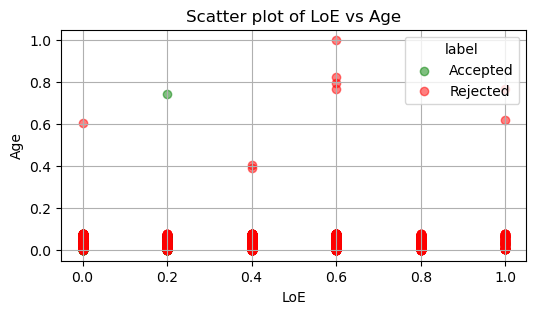

Correlation between LoE and Age = 0.023433219436316047


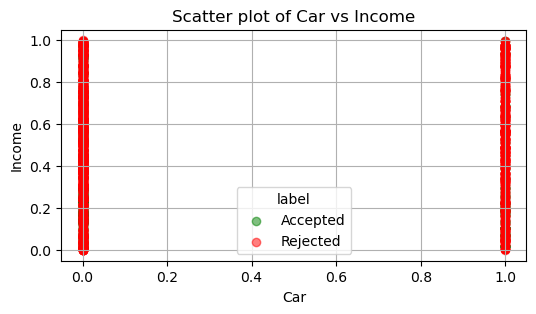

Correlation between Car and Income = -0.0028611681224039345


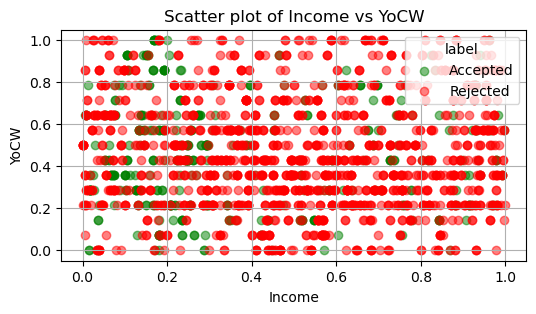

Correlation between Income and YoCW = -0.032044356430030105


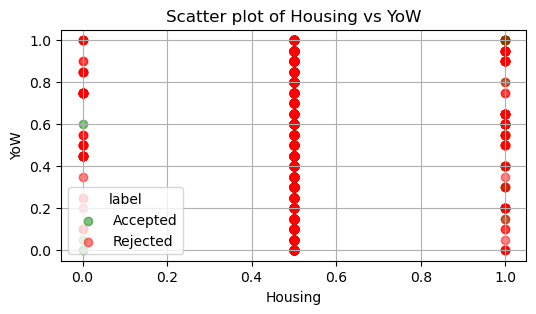

Correlation between Housing and YoW = 0.0254928927990373


In [100]:
## Plotting 2D scatterplots of features
for i in range(5):
    f1,f2 = np.random.choice(number_features, 2, replace=False)
    class1_indexes = np.where(labels == 0)
    class2_indexes = np.where(labels == 1)

    plt.figure(figsize=(6, 3))
    plt.scatter(data[class1_indexes][:,f1], data[class1_indexes][:,f2], color='Green', label='Accepted', alpha=0.5)
    plt.scatter(data[class2_indexes][:,f1], data[class2_indexes][:,f2], color='Red', label='Rejected', alpha=0.5)
    plt.title('Scatter plot of ' + feature_names[f1] + ' vs ' + feature_names[f2])
    plt.xlabel(feature_names[f1])
    plt.ylabel(feature_names[f2])
    plt.legend(title='label')
    plt.grid()
    plt.show()
    
    # Calculating correlations
    correlation = np.corrcoef(data[:,f1], data[:,f2])[0,1]
    print('Correlation between', feature_names[f1],'and',feature_names[f2],'=',correlation)

<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 2.4 -> T-Test <br>

<div dir="rtl">
ابتدا با توجه به شروط، دیتا یا لیبل را تقسیم کرده و سپس معنا دار بودن اختلاف میانگین دسته ها را با ttest_ind مشخص می کنیم. p-value نشان دهنده معنا دار بودن است اگر خیلی کوچک باشد. و t-test نشان دهنده اختلاف میانگین هاست که هر چه بزرگتر باشد، گزاره معنا دار تر است و بزرگ یا کوچکتر بودن آن شرط دوم گزاره را مشخص می کند. <br>
در گزاره اول برا اساس سطح آموزشی تقسیم بندی می کنیم و تست را بر روی برچسب ها که نشان دهنده اعتبار هستند اعمال می کنیم. میبینیم با توجه به p-value خیلی کوچک و t-test بزرگتر از 0 می توانیم تایید کنیم که آموزش سطح بالاتر با پذیرفته شدن رابطه ای معنادار دارد. <br> 
در گزاره دوم و سوم مشاهده می کنیم که اختلاف معناداری وجود ندارد پس گزاره ها صحیح نیست. <br>
گزاره چهارم معنا دار است چون p-value خیلی کوچکی دارد اما شرط دوم را قانع نمی کند یعنی که افراد مرد بالای 50 سال اتفاقا نرخ پذیرش بیشتری از مردان زیر 30 سال دارند. این مسئله با t-test مشخص شده است. پس این گزاره نیز صحیح نیست. <br>
گزاره پنجم نیز p-value در حد 0.3 دارد پس نمی تواند معناداری کافی را داشته باشد. این گزاره نیز درست نیست.

</div>

In [393]:
##### Phrase 1
#  Finding data with higher education
h_LoE = labels[ data_prep['LoE'] > np.mean(data_prep['LoE'])]
l_LoE = labels[ data_prep['LoE'] <= np.mean(data_prep['LoE'])]

# Calculating p-value
t_stat,p_value = ttest_ind(h_LoE, l_LoE)

print('.افرادی که سطح آموزشی بالاتری دارند از اعتبار بهتری برخوردار هستند   ->  t-stat =',t_stat,'   p-value =',p_value)
if (p_value < 0.05  and  t_stat > 0):
    print('The Phrase is correct\n')
else:
    print('The Phrase is not correct\n')
    
    
##### Phrase 2
#  Finding data with house or car
h_HouseCar = data_prep[ (data_prep['Housing'] == 2) | (data_prep['Car'] == 1)]
l_HouseCar = data_prep[ (data_prep['Housing'] != 2) & (data_prep['Car'] == 0)]

# Calculating p-value
t_stat,p_value = ttest_ind(h_HouseCar['Income'], l_HouseCar['Income'])

print('.عموما افراد با درآمد بالاتر يا صاحب خانه هستند يا ماشين دارند   ->  t-stat =',t_stat,'   p-value =',p_value)
if (p_value < 0.05 and t_stat > 0):
    print('The Phrase is correct\n')
else:
    print('The Phrase is not correct\n')


##### Phrase 3
#  Finding data with more stability in current job
h_YoCW = labels[ data_prep['YoCW'] >= 5]
l_YoCW = labels[ data_prep['YoCW'] < 5]

# Calculating p-value
t_stat,p_value = ttest_ind(h_YoCW, l_YoCW)

print('.افرادي كه در 5 سال اخير شغل خود را تغيير نداده اند اعتبار بالاتري دارند   ->  t-stat =',t_stat,'   p-value =',p_value)
if (p_value < 0.05 and t_stat > 0):
    print('The Phrase is correct\n')
else:
    print('The Phrase is not correct\n')


##### Phrase 4
#  Finding data with male age seperation
h_Age = labels[ (data_prep['MF'] == 1) & (data_prep['Age'] > 50)]
l_Age = labels[ (data_prep['MF'] == 1) & (data_prep['Age'] < 30)]

# Calculating p-value
t_stat,p_value = ttest_ind(h_Age, l_Age)

print('.مردان با سن بالاي 50 سال نسبت به مردان زير 30 سال نرخ پذيرش كمتري در اعتبارسنجي دارند   ->  t-stat =',t_stat,'   p-value =',p_value)
if (p_value < 0.05 and t_stat < 0):
    print('The Phrase is correct\n')
else:
    print('The Phrase is not correct\n')


##### Phrase 5
#  Finding data with men or women
male_MF = data_prep[ data_prep['MF'] == 1]
female_MF = data_prep[ data_prep['MF'] == 0]

# Calculating p-value
t_stat,p_value = ttest_ind(male_MF['Income'], female_MF['Income'])

print('.مردان درآمد بيشتري از زنان دارند   ->  t-stat =',t_stat,'   p-value =',p_value)
if (p_value < 0.05 and t_stat > 0):
    print('The Phrase is correct\n')
else:
    print('The Phrase is not correct\n')


.افرادی که سطح آموزشی بالاتری دارند از اعتبار بهتری برخوردار هستند   ->  t-stat = 12.353710553688835    p-value = 8.10830875208501e-34
The Phrase is correct

.عموما افراد با درآمد بالاتر يا صاحب خانه هستند يا ماشين دارند   ->  t-stat = 0.41642299269833954    p-value = 0.6771460321674014
The Phrase is not correct

.افرادي كه در 5 سال اخير شغل خود را تغيير نداده اند اعتبار بالاتري دارند   ->  t-stat = -0.343499414540515    p-value = 0.7312595663353922
The Phrase is not correct

.مردان با سن بالاي 50 سال نسبت به مردان زير 30 سال نرخ پذيرش كمتري در اعتبارسنجي دارند   ->  t-stat = 4.431853249284261    p-value = 1.0196722966607323e-05
The Phrase is not correct

.مردان درآمد بيشتري از زنان دارند   ->  t-stat = 1.060390709366515    p-value = 0.28909733705971086
The Phrase is not correct



<div dir=ltr align=left>
<font color=05fffb size=6>
    Part 3 -> Training & Testing <br>

<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 3.1 -> Searching for best model and its parameters <br>

<div dir="rtl">
همانطور که خواسته شده از سه روش طبقه بندی کننده Decision Tree، MLP  و C-SVM از نوع چند جمله ای استفاده می کنیم همچنین پارامتر های طبقه بندی کننده Random Forest را نیز مورد بررسی قرار می دهیم با اینکه برگرفته از درخت تصمیم است. طبقه بندی کننده ها را با پارامتر های مختلف می سازیم و ارزیابی می کنیم. در این مرحله بهترین پارامتر های هر کدام از طبقه بندی ها یافت می شود که در خروجی نیز معلوم است.
</div>

In [394]:
# Splitting data for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=2024)

##### MLP
# Defining model 
MLP_Model = MLPClassifier(max_iter=1000,random_state=2024)

# Searching for best parameters of MLP classifier model
param_grid = {
    'hidden_layer_sizes': [(50,),(100,),(100, 50)],
    'activation': ['tanh','relu','logistic'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001,0.05],
    'learning_rate': ['constant','adaptive']
}
grid_search = GridSearchCV(estimator=MLP_Model,param_grid=param_grid,cv=4,n_jobs=-1,scoring='f1',verbose=2)
grid_search.fit(X_train,Y_train)
print("Best parameters found for MLP: ", grid_search.best_params_)
print("Best cross-validation f1-score of MLP: {:.2f}".format(grid_search.best_score_*100))

# Performing best model on the data and testing
MLP_Model_best = grid_search.best_estimator_
MLP_Model_best.fit(X_train,Y_train)

MLP_Y_pred = MLP_Model_best.predict(X_test)


##### Decision Tree
# Defining model 
DT_Model = DecisionTreeClassifier(random_state=2024)

# Searching for best parameters of DT classifier model
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,10,20],
    'min_samples_leaf': [1,5,10],
    'max_features': [None,'auto','sqrt','log2']
}
grid_search = GridSearchCV(estimator=DT_Model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='f1',verbose=2)
grid_search.fit(X_train,Y_train)

print("Best parameters found for DT: ",grid_search.best_params_)
print("Best cross-validation f1-score of DT: {:.2f}".format(grid_search.best_score_*100))

# Performing best model on the data and testing
DT_Model_best = grid_search.best_estimator_
DT_Model_best.fit(X_train,Y_train)

DT_Y_pred = DT_Model_best.predict(X_test)


##### Random Forest
# Defining model 
RF_Model = RandomForestClassifier(random_state=2024)

# Searching for best parameters of RF classifier model
param_grid = {
    'n_estimators': [10,30,50],
    'criterion': ['gini','entropy'],
    'max_depth': [None, 10,20,30],
    'min_samples_split': [2,10,20],
    'min_samples_leaf': [1,5,10],
    'max_features': [None,'auto','sqrt','log2']
}
grid_search = GridSearchCV(estimator=RF_Model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='f1',verbose=2)
grid_search.fit(X_train,Y_train)

print("Best parameters found for RF: ",grid_search.best_params_)
print("Best cross-validation f1-score of RF: {:.2f}".format(grid_search.best_score_*100))

# Performing best model on the data and testing
RF_Model_best = grid_search.best_estimator_
RF_Model_best.fit(X_train,Y_train)

RF_Y_pred = RF_Model_best.predict(X_test)


##### C-SVM (POLY)  
# Defining degrees for range of 1 to 4   &    Using 11 different amounts for C
degree = [1, 2, 3, 4]
C = [0.05, 0.1, 0.5, 1, 5, 10, 20]
f1_max = 0
C_max = 0
gamma_max = 0
for j in degree:
    for i in C:
        # Model fitting
        SVM_Model = SVC(kernel='poly',C=i,degree=j)
        SVM_Model.fit(X_train,Y_train)

        # Validation
        SVM_Y_pred = SVM_Model.predict(X_test)
        SVM_f1 = f1_score(Y_test,SVM_Y_pred)
        
        if SVM_f1 > f1_max:
            f1_max = SVM_f1
            C_max = i
            degree_max = j
print("Best parameters found for C-SVM: C=",C_max,'Degree=',degree_max)

# Performing best model on the data and testing
SVM_Model_best = SVC(kernel='poly', C=C_max, degree=degree_max)
SVM_Model_best.fit(X_train,Y_train)

SVM_Y_pred = SVM_Model_best.predict(X_test)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
Best parameters found for MLP:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation f1-score of MLP: 92.69
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best parameters found for DT:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation f1-score of DT: 93.50
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters found for RF:  {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 10}
Best cross-validation f1-score of RF: 94.47
Best parameters found for C-SVM: C= 1 Degree= 4


<div dir="rtl">
در بخش قبل 80 درصد داده را برای آموزش و 20 درصد را برای ارزیابی استفاده می کردیم و بهترین طبقه بند های هر سه گروه بدست آمد. در این جا معیار های ارزیابی را با توجه به داده تست داده شده، برای هر کدام به علاوه Logistic Regression بدست می آوریم تا بالاخره مدل طبقه بند مطلوب را انتخاب کنیم. <br>
مشاهده می کنیم که فرق چندان جدی ای وجود ندارد اما به هر حال به خصوص با معیار هایی که برای داده های نا متعادل مناسب هستند، طبقه بندی کننده های Random Forest که برگرفته از درخت تصمیم است و شبکه عصبی مصنوعی بهتر هستند. با توجه به آنکه محدودیت زمان بندی 200 میلی ثانیه ای گذاشته شده است، RF را با پارامتر های بهینه به عنوان طبقه بند مناسب بر میگزینیم.
</div>

In [395]:
### Finding best model
## MLP
accuracie = accuracy_score(Y_test,MLP_Y_pred)
precision = precision_score(Y_test,MLP_Y_pred)
recall = recall_score(Y_test,MLP_Y_pred)
f1score = f1_score(Y_test,MLP_Y_pred)
auprc = average_precision_score(Y_test,MLP_Y_pred)
print('MLP :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

## DT
accuracie = accuracy_score(Y_test,DT_Y_pred)
precision = precision_score(Y_test,DT_Y_pred)
recall = recall_score(Y_test,DT_Y_pred)
f1score = f1_score(Y_test,DT_Y_pred)
auprc = average_precision_score(Y_test,DT_Y_pred)
print('\nDT :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

## RF
accuracie = accuracy_score(Y_test,RF_Y_pred)
precision = precision_score(Y_test,RF_Y_pred)
recall = recall_score(Y_test,RF_Y_pred)
f1score = f1_score(Y_test,RF_Y_pred)
auprc = average_precision_score(Y_test,RF_Y_pred)
print('\nRF :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

## C-SVM
accuracie = accuracy_score(Y_test,SVM_Y_pred)
precision = precision_score(Y_test,SVM_Y_pred)
recall = recall_score(Y_test,SVM_Y_pred)
f1score = f1_score(Y_test,SVM_Y_pred)
auprc = average_precision_score(Y_test,SVM_Y_pred)
print('\nC-SVM :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

## LR
# Model fitting
LR_Model = LogisticRegression()
LR_Model.fit(X_train,Y_train)
# Predicting
LR_Y_pred = LR_Model.predict(X_test)

accuracie = accuracy_score(Y_test,LR_Y_pred)
precision = precision_score(Y_test,LR_Y_pred)
recall = recall_score(Y_test,LR_Y_pred)
f1score = f1_score(Y_test,LR_Y_pred)
auprc = average_precision_score(Y_test,LR_Y_pred)
print('\nLogistic Regression :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

MLP :
Accuracy -> 86.25954198473282
Precision -> 86.24641833810888
Recall -> 98.0456026058632
F1 Score -> 91.76829268292683
AUPRC -> 86.08753814282447

DT :
Accuracy -> 85.75063613231552
Precision -> 87.91540785498489
Recall -> 94.78827361563518
F1 Score -> 91.22257053291534
AUPRC -> 87.40474416722313

RF :
Accuracy -> 86.00508905852418
Precision -> 86.62790697674419
Recall -> 97.06840390879479
F1 Score -> 91.55145929339477
AUPRC -> 86.37840297779893

C-SVM :
Accuracy -> 84.47837150127226
Precision -> 83.97790055248619
Recall -> 99.0228013029316
F1 Score -> 90.88191330343797
AUPRC -> 83.92062838108785

Logistic Regression :
Accuracy -> 82.95165394402035
Precision -> 83.14917127071824
Recall -> 98.0456026058632
F1 Score -> 89.98505231689087
AUPRC -> 83.05082359140887


<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 3.2 -> Training & Testing <br>

<div dir="rtl">
در این مرحله 5 بار داده ها را به آموزش و تست تقسیم کرده، مدل را آموزش داده و از آن تست می گیریم. معیار های ارزیابی را هر 5 بار حساب کرده و در نهایت میانگین ها را گزارش می دهیم. همچنین ماتریس کانفیوژن آخرین طبقه بندی نیز رسم می شود. از بهترین مدل که Random Forest با پارامتر های تعیین شده در بخش قبل استفاده می کنیم. <br>
مشاهده می شود که F-score در حدود 94 و AUPRC در حدود 90 درصد است که نشان دهنده انجام مناسب طبقه بندی است.
</div>

Train Time 1 = 171.70405387878418 ms
Train Time 2 = 103.10888290405273 ms
Train Time 3 = 137.62307167053223 ms
Train Time 4 = 120.39327621459961 ms
Train Time 5 = 126.47747993469238 ms


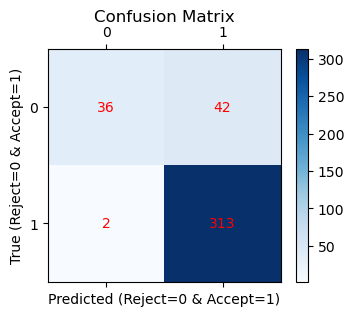


Accuracy -> mean = 90.02544529262086 variance = 8.65010456526101e-05
Precision -> mean = 89.90147431317789 variance = 0.0001556490803427168
Recall -> mean = 98.80835145709128 variance = 3.761569456146073e-05
F1 Score -> mean = 94.13714268611753 variance = 3.431896405421917e-05
AUPRC -> mean = 89.79302466137258 variance= 0.00014938768422021804


In [397]:
## Training & Validating
accuracies = np.zeros(5)
precisions = np.zeros(5)
recalls = np.zeros(5)
f1scores = np.zeros(5)
auprcs = np.zeros(5)

for i in range(5):
    # Splitting data for training and testing
    X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2)
    
    # Training model and calculating time
    RF_Model_best = grid_search.best_estimator_
    model = RF_Model_best
    start = time.time()
    model.fit(X_train,Y_train)
    train_time = time.time() - start
    print('Train Time',i+1,'=',train_time*1000,'ms')
    
    # Testing model
    Y_pred = model.predict(X_test)
    
    # Meterics
    accuracies[i] = accuracy_score(Y_test,Y_pred)
    precisions[i] = precision_score(Y_test,Y_pred)
    recalls[i] = recall_score(Y_test,Y_pred)
    f1scores[i] = f1_score(Y_test,Y_pred)
    auprcs[i] = average_precision_score(Y_test,Y_pred)

## Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(4, 3))
plt.matshow(conf_matrix, cmap='Blues', fignum=1)
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted (Reject=0 & Accept=1)')
plt.ylabel('True (Reject=0 & Accept=1)')
for (i, j), val in np.ndenumerate(conf_matrix):
    plt.text(j,i,f'{val}',ha='center',va='center',color='red')
plt.colorbar()
plt.show()

## Printing meterics   
print('\nAccuracy -> mean =',np.mean(accuracies)*100,'variance =',np.var(accuracies))
print('Precision -> mean =',np.mean(precisions)*100,'variance =',np.var(precisions))
print('Recall -> mean =',np.mean(recalls)*100,'variance =',np.var(recalls))
print('F1 Score -> mean =',np.mean(f1scores)*100,'variance =',np.var(f1scores))
print('AUPRC -> mean =',np.mean(auprcs)*100,'variance=',np.var(auprcs))

<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 3.3 -> Testing test data <br>

<div dir="rtl">
حال داده تست داده شده را به مدل ترین شده در مرحله قبل می دهیم و خروجی آن را برچسب هایی را که میزند در یک فایل تکست ذخیره می کنیم.
</div>

In [398]:
## Reading test data
data_test_raw = pd.read_csv('test_data_1.csv')

## Preprocessing
# Removing outliers
number_cols = data_test_raw.select_dtypes(include=['int64']).columns
data_prep_test = data_test_raw
for i in number_cols:
    mean_col = np.mean(data_test_raw[i])
    std_col = np.std(data_test_raw[i])
    l_bound = mean_col - 2*std_col
    h_bound = mean_col + 2*std_col
    data_prep_test = data_test_raw[(data_test_raw[i] >= l_bound) & (data_test_raw[i] <= h_bound)]
    
# Removing NANs
data_prep_test = data_prep_test.dropna()

# Changing object columns to numerical
data_prep_test['MF'] = data_prep_test['MF'].map({'M':1 ,'F':0})
data_prep_test['LoE'] = data_prep_test['LoE'].map({'Dip':0 ,'Ad. Dip':1 ,'Bach':2 ,'Mst':3 ,'Doct':4 ,'P. Doct':5})
data_prep_test['Housing'] = data_prep_test['Housing'].map({'O':2 ,'R':1 ,'N':0})
data_prep_test['Car'] = data_prep_test['Car'].map({True:1 ,False:0})

#Normalization (z-score)
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_prep_test)


## Predicting
Y_pred_test = model.predict(data_test)
with open('predicted_labels.txt', 'w') as f:
    for i in range(np.size(Y_pred_test)):
        print(Y_pred_test[i])
        f.write(str(Y_pred_test[i]))
        f.write('\n')

1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1


<div dir=ltr align=left>
<font color=05fffb size=6>
    Part 4 -> Model simplification <br>

<div dir="rtl">
برای این بخس ابتدا همبستگی تک تک ویژگی ها را با برچسب ها می سنجیم و به ترتیب ویژگی های با کمترین همبستگی را حذف می کنیم و هر بار AUPRC را مورد محاسبه قرار می دهیم تا ببینیم پایینتر از 80 درصد آمده است یا خیر. مشاهده می کنیم که حتی اگر تمام فیچر ها حذف شوند و صرفا سطح آموزشی (LoE) باقی بماند، باز هم AUPRC بالای 80 درصد است. <br>
با تغییر آستانه به حدود 88 درصد، تعداد ویژگی های حذف شده کم تر شده و به 1 یا 3 یا بیشتر می رسد.
</div>

In [419]:
# Calculating correlations between features and labels
L = np.size(data,1)
correlations = np.zeros((L,1))
for i in range(L):
    correlations[i] = (np.corrcoef(data[:,i],labels)[0,1])
    print('Correlation of feature ' + feature_names[i] + ' with labels is ',correlations[i])

# Deleting least correlated features
auprc_reduction = 100
counter = 1
data_reduced = data
deleted_features = []
names = feature_names
while auprc_reduction > 80 and counter < L :
    counter += 1
    
    # Reducing feature
    feature_min_corr = np.argmin(np.abs(correlations))
    deleted_features.append(names[feature_min_corr])
    correlations = np.delete(correlations,feature_min_corr,axis=0)
    names = np.delete(names,feature_min_corr,axis=0)
    data_reduced = np.delete(data_reduced,feature_min_corr,axis=1)
    
    # Splitting data for training and testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_reduced,labels,test_size=0.2)
    
    # Training model and calculating time
    RF_Model_best = grid_search.best_estimator_
    model = RF_Model_best
    model.fit(X_train,Y_train)
    
    # Testing model
    Y_pred = model.predict(X_test)
    
    # Updating AUPRC
    auprc_reduction = average_precision_score(Y_test,Y_pred)*100
   
print('\nDeleted features are :', deleted_features)

# Meterics
accuracie = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f1score = f1_score(Y_test,Y_pred)
auprc = average_precision_score(Y_test,Y_pred)

# Printing meterics   
print('\nAccuracy =',accuracie*100)
print('Precision =',precision*100)
print('Recall =',recall*100)
print('F1 Score =',f1score*100)
print('AUPRC =',auprc*100)

Correlation of feature Id with labels is  [-0.01976041]
Correlation of feature Age with labels is  [0.05081657]
Correlation of feature MF with labels is  [0.0197225]
Correlation of feature LoE with labels is  [0.35473572]
Correlation of feature YoW with labels is  [-0.02246378]
Correlation of feature YoCW with labels is  [-0.01286578]
Correlation of feature Income with labels is  [0.21124357]
Correlation of feature Housing with labels is  [-0.02565218]
Correlation of feature Car with labels is  [0.03033649]

Deleted features are : ['YoCW', 'MF', 'Id', 'YoW', 'Housing', 'Car', 'Age', 'Income']

Accuracy = 79.89821882951654
Precision = 81.81818181818183
Recall = 94.25675675675676
F1 Score = 87.59811616954474
AUPRC = 81.4448643647117


<div dir="rtl">
در این بخش ابتدا میانگین داده را 0 می کنیم تا بتوانیم PCA را بر روی آن اعمال کنیم. پس از اعمال، تا زمانی که AUPRC به کوچکتر از 80 درصد نرسیده یا تعداد کامپوننت نگه داشته شده توسط PCA به یک نرسیده ادامه می دهد و کاهش بعد می کند. <br>
مشاهده می کنیم که همانند بخش قبلی این بار هم از 9 بعد ابتدایی، 8 بعد با واریانس کمتر حذف می شوند و داده با یک بعد با بیشترین واریانس نیز AUPCR بالای 80 درصد را حفظ می کند. پس 1 ویژگی کافی است و اینطور است که مدل ساده شده و حجم محاسبات نیز کاهش می یابد. <br>
با تغییر آستانه به حدود 88 درصد، تعداد کامپوننت های حذف شده کم تر شده و به 1 الی 5 یا بیشتر می رسد.

</div>

In [424]:
# Performing PCA on data
L = np.size(data,1)
data_mean = np.mean(data,0)
data_meanless = data - data_mean 
pca = PCA()
pca.fit(data_meanless)

# Reducing least varianced dimensions with PCA
auprc_reduction = 100
number_components = np.size(data,1) + 1
while auprc_reduction > 80 and number_components > 1 :
    number_components -= 1
    
    # Reducing dimension
    data_PCA = np.dot(pca.transform(data_meanless)[:,0:number_components], pca.components_[0:number_components,:])
    data_PCA = data_PCA + data_mean
    
    # Splitting data for training and testing
    X_train, X_test, Y_train, Y_test = train_test_split(data_PCA,labels,test_size=0.2)
    
    # Training model and calculating time
    RF_Model_best = grid_search.best_estimator_
    model = RF_Model_best
    model.fit(X_train,Y_train)
    
    # Testing model
    Y_pred = model.predict(X_test)
    
    # Updating AUPRC
    auprc_reduction = average_precision_score(Y_test,Y_pred)*100
   
print('Number of reduced dimensions :', L-number_components)

# Meterics
accuracie = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
f1score = f1_score(Y_test,Y_pred)
auprc = average_precision_score(Y_test,Y_pred)

# Printing meterics   
print('\nAccuracy =',accuracie*100)
print('Precision =',precision*100)
print('Recall =',recall*100)
print('F1 Score =',f1score*100)
print('AUPRC =',auprc*100)

Number of reduced dimensions : 8

Accuracy = 77.09923664122137
Precision = 81.04956268221575
Recall = 91.74917491749174
F1 Score = 86.06811145510835
AUPRC = 80.72362819038452


<div dir=ltr align=left>
<font color=05fffb size=6>
    Part 6 -> Learning using ensemble <br>

<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 6.1 -> Data partition method <br>

<div dir="rtl">
در این قسمت مدل درخت تصمیم را انتخاب می کنیم و با تعداد های 5، 10 و 20 به هر دو صورت رای گیری نرم و سخت، مدل ترکیبی را آموزش داده و تست می گیریم تا بهترین تعداد و بهترین شیوه بدست آید. در این بخش تقسیم بندی بر روی خود داده انجام شده است و نه ویژگی ها. <br>
5 بار آموزش و ارزیابی را تکرار می کنیم و معیار های میانگین را بدست می آوریم.
</div>

In [403]:
# Training and testing for different numbers of weak learners
leaneres_number = [5,10,20]
for i in range(len(leaneres_number)):
    auprc_max = 0
    accuracies_hard = np.zeros(5)
    precisions_hard = np.zeros(5)
    recalls_hard = np.zeros(5)
    f1scores_hard = np.zeros(5)
    auprcs_hard = np.zeros(5)
    
    accuracies_soft = np.zeros(5)
    precisions_soft = np.zeros(5)
    recalls_soft = np.zeros(5)
    f1scores_soft = np.zeros(5)
    auprcs_soft = np.zeros(5)
    
    # 5 iterations
    for t in range(5):
        # Splitting data for training and testing
        X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2)

        # Splitting data to subsets
        number_learner = leaneres_number[i]
        X_splitted = np.array_split(X_train,number_learner)
        Y_splitted = np.array_split(Y_train,number_learner)
        
        # Defining learners
        models = []
        for j in range(number_learner):
            model = DecisionTreeClassifier()
            model.fit(X_splitted[j],Y_splitted[j])
            models.append(('DT model ' + str(j), model))
        
        # Defining ensemble of learners and fitting it
        model_ensemble_hard = VotingClassifier(models,voting='hard')
        model_ensemble_soft = VotingClassifier(models,voting='soft')
        model_ensemble_hard.fit(X_train,Y_train)
        model_ensemble_soft.fit(X_train,Y_train)
        
        # Predicting
        Ensemble_Y_pred_hard = model_ensemble_hard.predict(X_test)
        Ensemble_Y_pred_soft = model_ensemble_soft.predict(X_test)
        
        # Meterics
        accuracies_hard[t] = accuracy_score(Y_test,Ensemble_Y_pred_hard)
        precisions_hard[t] = precision_score(Y_test,Ensemble_Y_pred_hard)
        recalls_hard[t] = recall_score(Y_test,Ensemble_Y_pred_hard)
        f1scores_hard[t] = f1_score(Y_test,Ensemble_Y_pred_hard)
        auprcs_hard[t] = average_precision_score(Y_test,Ensemble_Y_pred_hard)
        
        accuracies_soft[t] = accuracy_score(Y_test,Ensemble_Y_pred_soft)
        precisions_soft[t] = precision_score(Y_test,Ensemble_Y_pred_soft)
        recalls_soft[t] = recall_score(Y_test,Ensemble_Y_pred_soft)
        f1scores_soft[t] = f1_score(Y_test,Ensemble_Y_pred_soft)
        auprcs_soft[t] = average_precision_score(Y_test,Ensemble_Y_pred_soft)
        
    print('\nEnsemble of',number_learner,'weak learners with hard voting (data splitting) :')
    print('Accuracy -> mean =',np.mean(accuracies_hard)*100,'variance =',np.var(accuracies_hard))
    print('Precision -> mean =',np.mean(precisions_hard)*100,'variance =',np.var(precisions_hard))
    print('Recall -> mean =',np.mean(recalls_hard)*100,'variance =',np.var(recalls_hard))
    print('F1 Score -> mean =',np.mean(f1scores_hard)*100,'variance =',np.var(f1scores_hard))
    print('AUPRC -> mean =',np.mean(auprcs_hard)*100,'variance=',np.var(auprcs_hard))
    if np.mean(auprcs_hard)*100 >= auprc_max:
        auprc_max = np.mean(auprcs_hard)*100
        hard_or_soft = 1
        best_number = number_learner
    
    print('\nEnsemble of',number_learner,'weak learners with soft voting (data splitting) :')
    print('Accuracy -> mean =',np.mean(accuracies_soft)*100,'variance =',np.var(accuracies_soft))
    print('Precision -> mean =',np.mean(precisions_soft)*100,'variance =',np.var(precisions_soft))
    print('Recall -> mean =',np.mean(recalls_soft)*100,'variance =',np.var(recalls_soft))
    print('F1 Score -> mean =',np.mean(f1scores_soft)*100,'variance =',np.var(f1scores_soft))
    print('AUPRC -> mean =',np.mean(auprcs_soft)*100,'variance=',np.var(auprcs_soft))
    if np.mean(auprcs_hard)*100 >= auprc_max:
        auprc_max = np.mean(auprcs_soft)*100
        hard_or_soft = 2
        best_number = number_learner
        


Ensemble of 5 weak learners with hard voting (data splitting) :
Accuracy -> mean = 85.3944020356234 variance = 0.0002605390776243283
Precision -> mean = 91.55799958701033 variance = 7.127061535344667e-05
Recall -> mean = 90.09000700336485 variance = 0.0005446972585858604
F1 Score -> mean = 90.79742155037114 variance = 0.0001232614488134557
AUPRC -> mean = 90.41701292554443 variance= 5.216152642870208e-05

Ensemble of 5 weak learners with soft voting (data splitting) :
Accuracy -> mean = 85.19083969465649 variance = 0.000164196595639985
Precision -> mean = 91.5884463478183 variance = 6.468292900513068e-05
Recall -> mean = 89.78044284561051 variance = 0.0003762892164146761
F1 Score -> mean = 90.65874584768896 variance = 7.468405606412722e-05
AUPRC -> mean = 90.41404213294196 variance= 4.371656655550438e-05

Ensemble of 10 weak learners with hard voting (data splitting) :
Accuracy -> mean = 85.80152671755725 variance = 3.988371566018562e-05
Precision -> mean = 91.50329444816097 variance 

<div dir="rtl">
بهترین مدل با استفاده از بخش قبل را بر روی داده آموزش داده و تست می کنیم. می بینیم که معیار ها بسیار پیشرفت کرده اند.
</div>

In [404]:
# Best ensemble model
if hard_or_soft == 1:
    print('Best number of weak learners is',best_number,'with hard voting')
elif hard_or_soft == 2:
    print('Best number of weak learners is',best_number,'with soft voting')
    
# Splitting data to subsets
number_learner = leaneres_number[i]
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2)
X_splitted = np.array_split(X_train,number_learner)
Y_splitted = np.array_split(Y_train,number_learner)

# Defining learners
models = []
for j in range(best_number):
    model = DecisionTreeClassifier()
    model.fit(X_splitted[j],Y_splitted[j])
    models.append(('DT model ' + str(j), model))

# Defining ensemble of learners and fitting it
if hard_or_soft == 1:
    model_ensemble = VotingClassifier(models,voting='hard')
elif hard_or_soft == 2:
    model_ensemble = VotingClassifier(models,voting='soft')
model_ensemble.fit(X_train,Y_train)

# Predicting
Ensemble_Y_pred = model_ensemble_hard.predict(X_test)

# Meterics
accuracie = accuracy_score(Y_test,Ensemble_Y_pred)
precision = precision_score(Y_test,Ensemble_Y_pred)
recall = recall_score(Y_test,Ensemble_Y_pred)
f1score = f1_score(Y_test,Ensemble_Y_pred)
auprc = average_precision_score(Y_test,Ensemble_Y_pred)
print('\nBest ensemble :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

Best number of weak learners is 20 with soft voting

Best ensemble :
Accuracy -> 96.69211195928753
Precision -> 97.80564263322884
Recall -> 98.11320754716981
F1 Score -> 97.95918367346938
AUPRC -> 97.48697070683492


<div dir=ltr align=left>
<font color=fffb03 size=4>
    Part 6.2 -> Features partition method <br>

<div dir="rtl">
این بخش همانند قبل است منتها تقسیم بندی بر روی ویژگی ها انجام می شود و نه سطر ها.
</div>

In [428]:
# Training and testing for different numbers of weak learners
leaneres_number = [2,3,4]
for i in range(len(leaneres_number)):
    auprc_max = 0
    accuracies_hard = np.zeros(5)
    precisions_hard = np.zeros(5)
    recalls_hard = np.zeros(5)
    f1scores_hard = np.zeros(5)
    auprcs_hard = np.zeros(5)
    
    accuracies_soft = np.zeros(5)
    precisions_soft = np.zeros(5)
    recalls_soft = np.zeros(5)
    f1scores_soft = np.zeros(5)
    auprcs_soft = np.zeros(5)
    
    # 5 iterations
    for t in range(5):
        # Splitting data for training and testing
        X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2)

        # Splitting data to subsets
        number_learner = leaneres_number[i]
        X_features_splitted = np.array_split(X_train,number_learner,axis=1)
        
        # Defining learners
        models = []
        for j in range(number_learner):
            model = DecisionTreeClassifier()
            model.fit(X_features_splitted[j],Y_train)
            models.append(('DT model ' + str(j), model))
        
        # Defining ensemble of learners and fitting it
        model_ensemble_hard = VotingClassifier(models,voting='hard')
        model_ensemble_soft = VotingClassifier(models,voting='soft')
        model_ensemble_hard.fit(X_train,Y_train)
        model_ensemble_soft.fit(X_train,Y_train)
        
        # Predicting
        Ensemble_Y_pred_hard = model_ensemble_hard.predict(X_test)
        Ensemble_Y_pred_soft = model_ensemble_soft.predict(X_test)
        
        # Meterics
        accuracies_hard[t] = accuracy_score(Y_test,Ensemble_Y_pred_hard)
        precisions_hard[t] = precision_score(Y_test,Ensemble_Y_pred_hard)
        recalls_hard[t] = recall_score(Y_test,Ensemble_Y_pred_hard)
        f1scores_hard[t] = f1_score(Y_test,Ensemble_Y_pred_hard)
        auprcs_hard[t] = average_precision_score(Y_test,Ensemble_Y_pred_hard)
        
        accuracies_soft[t] = accuracy_score(Y_test,Ensemble_Y_pred_soft)
        precisions_soft[t] = precision_score(Y_test,Ensemble_Y_pred_soft)
        recalls_soft[t] = recall_score(Y_test,Ensemble_Y_pred_soft)
        f1scores_soft[t] = f1_score(Y_test,Ensemble_Y_pred_soft)
        auprcs_soft[t] = average_precision_score(Y_test,Ensemble_Y_pred_soft)
        
    print('\nEnsemble of',number_learner,'weak learners with hard voting (data splitting) :')
    print('Accuracy -> mean =',np.mean(accuracies_hard)*100,'variance =',np.var(accuracies_hard))
    print('Precision -> mean =',np.mean(precisions_hard)*100,'variance =',np.var(precisions_hard))
    print('Recall -> mean =',np.mean(recalls_hard)*100,'variance =',np.var(recalls_hard))
    print('F1 Score -> mean =',np.mean(f1scores_hard)*100,'variance =',np.var(f1scores_hard))
    print('AUPRC -> mean =',np.mean(auprcs_hard)*100,'variance=',np.var(auprcs_hard))
    if np.mean(auprcs_hard)*100 >= auprc_max:
        auprc_max = np.mean(auprcs_hard)*100
        hard_or_soft = 1
        best_number = number_learner
    
    print('\nEnsemble of',number_learner,'weak learners with soft voting (data splitting) :')
    print('Accuracy -> mean =',np.mean(accuracies_soft)*100,'variance =',np.var(accuracies_soft))
    print('Precision -> mean =',np.mean(precisions_soft)*100,'variance =',np.var(precisions_soft))
    print('Recall -> mean =',np.mean(recalls_soft)*100,'variance =',np.var(recalls_soft))
    print('F1 Score -> mean =',np.mean(f1scores_soft)*100,'variance =',np.var(f1scores_soft))
    print('AUPRC -> mean =',np.mean(auprcs_soft)*100,'variance=',np.var(auprcs_soft))
    if np.mean(auprcs_hard)*100 >= auprc_max:
        auprc_max = np.mean(auprcs_soft)*100
        hard_or_soft = 2
        best_number = number_learner


Ensemble of 2 weak learners with hard voting (data splitting) :
Accuracy -> mean = 85.13994910941476 variance = 0.00012327693931330096
Precision -> mean = 91.0594307661425 variance = 0.00020108523126046774
Recall -> mean = 90.0200667644157 variance = 0.00033500854330974016
F1 Score -> mean = 90.51468226361443 variance = 7.03238723625175e-05
AUPRC -> mean = 89.84676337146193 variance= 0.00018598952547302461

Ensemble of 2 weak learners with soft voting (data splitting) :
Accuracy -> mean = 85.08905852417303 variance = 8.701901598585964e-05
Precision -> mean = 91.16804379511278 variance = 0.00014205026093531295
Recall -> mean = 89.84237096204701 variance = 0.00042124736745951483
F1 Score -> mean = 90.47370839900827 variance = 4.2100595845599945e-05
AUPRC -> mean = 89.92828495403764 variance= 0.00011307964809609508

Ensemble of 3 weak learners with hard voting (data splitting) :
Accuracy -> mean = 83.96946564885496 variance = 2.848836832870414e-05
Precision -> mean = 90.75169519958811 va

<div dir="rtl">
بهترین مدل با استفاده از بخش قبل را بر روی داده آموزش داده و تست می کنیم. می بینیم که معیار ها بسیار پیشرفت کرده اند. <br>
هر دو تقسیم داده یا ویژگی بسیار بسیار خوب و در حدود 98 درصد عمل کرده اند. اما گویا تقسیم بندی ویژگی شاید در حد یک درصد بهتر است.
</div>

In [434]:
# Best ensemble model
if hard_or_soft == 1:
    print('Best number of weak learners is',best_number,'with hard voting')
elif hard_or_soft == 2:
    print('Best number of weak learners is',best_number,'with soft voting')
    
# Splitting data to subsets
number_learner = leaneres_number[i]
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2)
X_features_splitted = np.array_split(X_train,number_learner,axis=1)

# Defining learners
models = []
for j in range(best_number):
    model = DecisionTreeClassifier()
    model.fit(X_features_splitted[j],Y_train)
    models.append(('DT model ' + str(j), model))

# Defining ensemble of learners and fitting it
if hard_or_soft == 1:
    model_ensemble = VotingClassifier(models,voting='hard')
elif hard_or_soft == 2:
    model_ensemble = VotingClassifier(models,voting='soft')
model_ensemble.fit(X_train,Y_train)

# Predicting
Ensemble_Y_pred = model_ensemble_hard.predict(X_test)

# Meterics
accuracie = accuracy_score(Y_test,Ensemble_Y_pred)
precision = precision_score(Y_test,Ensemble_Y_pred)
recall = recall_score(Y_test,Ensemble_Y_pred)
f1score = f1_score(Y_test,Ensemble_Y_pred)
auprc = average_precision_score(Y_test,Ensemble_Y_pred)
print('\nBest ensemble :')
print('Accuracy ->',accuracie*100)
print('Precision ->',precision*100)
print('Recall ->',recall*100)
print('F1 Score ->',f1score*100)
print('AUPRC ->',auprc*100)

Best number of weak learners is 4 with soft voting

Best ensemble :
Accuracy -> 97.70992366412213
Precision -> 98.39228295819936
Recall -> 98.70967741935483
F1 Score -> 98.55072463768116
AUPRC -> 98.14051681841204
